# Introduction to Simple Linear Regression in Python

[FC Python Machine Learning - Original blog post](https://fcpython.com/machine-learning/introduction-to-simple-linear-regression-in-python)

![FCPython](images/logofcpy.png)

Linear regression allows us to model the relationship between variables. This might allow us to predict a future outcome if we already know some information, or give us an insight into what is needed to reach a goal.

To fit a linear regression model, we need one dependent variable, which we will study the changes of as one or more independent variables are changed. As an example, we could model how many goals are scored (dependent variable), as more shots are taken (independent variable). As we have just one independent variable, this is a simple linear regression – models that take in multiple independent variables are are known as multiple linear regressions.

This article is going to apply a simple linear regression model to squad value data against performance in the Premier League. This might help us to see how much a squad might need to invest to avoid relegation, make European spots or to create a data-driven target for our team.

The steps that we are going to take include a quick look & explore of our dataset, creating the model & then making some assessments on the back of it. Then, we’ll calculate a better metric to improve our model. We will use the sklearn module to make this much less intimidating than it might seem right now! Let’s get the modules in place and read in a local dataset called positionsvsValue.

## 1. Import basics pandas

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## 2. Imports sklearn LinearRegression  , train test split and metrics for RMSE

In [2]:
from sklearn.model_selection import train_test_split # SPLIT TRAIN TEST SET
from sklearn.linear_model import LinearRegression  # REGRESION LINEAL
from sklearn import metrics   # PARA EL RMSE METRICAS DE EVALUACION DEL ALGORITMO

## 3. Load data

In [3]:
data = pd.read_csv("positionsvsValue.csv")
data.head(25)

,League,Season,Team,Squad,Average Age,Non-Homegrown,Squad Value,Avg Player Value,GD,Points,Position
0,EPL,2008,Chelsea FC,28,25.6,21,406.70,14.53,44,83,3
1,EPL,2008,Manchester United,31,24.3,20,356.10,11.49,44,90,1
2,EPL,2008,Liverpool FC,28,23.9,24,257.23,9.19,50,86,2
3,EPL,2008,Arsenal FC,38,21.3,30,250.85,6.6,31,72,4
4,EPL,2008,Tottenham Hotspur,35,22.5,18,212.60,6.07,0,51,8
5,EPL,2008,Manchester City,32,24.0,20,206.80,6.46,8,50,10
6,EPL,2008,Everton FC,28,24.4,15,162.55,5.81,18,63,5
7,EPL,2008,Newcastle United,32,24.8,20,134.95,4.22,-19,34,18
8,EPL,2008,Portsmouth FC,31,26.8,19,131.50,4.24,-19,41,14
9,EPL,2008,Aston Villa,21,25.4,8,111.80,5.32,6,62,6


### View rows and cols 220 rows and 11 columns

In [4]:
data.shape

(220, 11)

In [5]:
data.describe()

,Season,Squad,Average Age,Non-Homegrown,Squad Value,GD,Points,Position
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,2013.000000,36.304545,24.793636,22.886364,225.792909,0.000000,52.245455,10.500000
std,3.169489,5.410372,1.136427,5.377171,183.079602,27.061405,17.569788,5.779431
min,2008.000000,21.000000,21.300000,8.000000,22.500000,-54.000000,16.000000,1.000000
25%,2010.000000,33.000000,23.975000,19.000000,99.662500,-20.000000,40.000000,5.750000
50%,2013.000000,36.000000,24.800000,22.000000,158.275000,-7.000000,47.000000,10.500000
75%,2016.000000,40.000000,25.500000,26.000000,299.782500,20.250000,64.250000,15.250000
max,2018.000000,54.000000,28.100000,41.000000,1000.100000,79.000000,100.000000,20.000000


So we have a 220-row dataset, with each row being a team in each Premier League season since 2008/09. 

For each of the **teams**, we get:
* **squad sizes**
* **ages**
* **squad value (in Euros)** 

As well as **Performance** data with

* **goal difference**
* **points** 
* **position** 

The values are taken from **Transfermarkt**

Our aim is to get a model together that would help us to **predict a team’s points based on their squad value**. Before we do that, we should check to see what the relationships are among some of the key variables. 

Let’s do that visually with a pair plot.


## 4. Pairplot (Season, GoalDiff, Squad Value, Points, Position)  Analyse Correlations

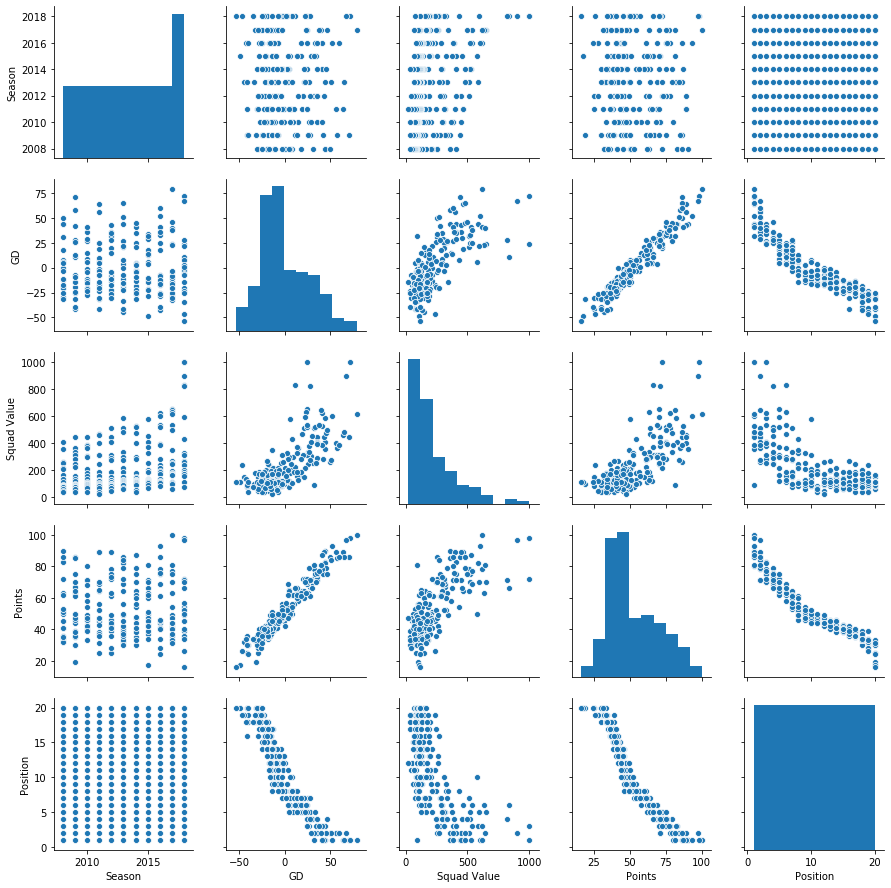

In [22]:
sns.pairplot(data[['Season','GD', 'Squad Value', 'Points', 'Position']]  );

![FCPython](images/pairplot_1.png)

## Some interesting points to keep in mind:

* **Points & goal difference correlate really strongly, as you might expect**.
* **Squad value goes up as goal difference and points go up**, but as more of a curve than a line.
* **Squad value has increased over time (important! We’ll come back to this)**

Thinking back to our initial problem – **modelling squad value on performance** – we need to define what performance is.
I think that we can answer this by seeing **which of points and position correlate more with squad value**. Let’s check if position correlates more than points:


### Correlate Squad Value and Position
<p style= font-size:1.3em;color:red;"> Negative</p>

In [24]:
data['Squad Value'].corr(data['Position'])

-0.6698313755033489

### Correlate Squad Value and Points
<p style= font-size:1.3em;color:green;"> Positive</p>

In [27]:
data['Squad Value'].corr(data['Points'])

0.7392567705822433

In [28]:
abs( data['Squad Value'].corr(data['Position']) ) > data['Squad Value'].corr(data['Points'] )

False

Seemingly not, we’re going to build our model around **how many points you should expect for your squad value, not the position**.

# 5. Building our Regression Model

We’ll take the following steps:

* 5.1) Get and **reshape the two columns that we want to use in our model: Points & Squad Value**

* 5.2) **Split each of the two variables into a training set**, and a test set. The train set will build our model, the test set will allow us to see how good the model is.

* 5.3) Create an empty **linear regression model**, then fit it against our two training sets

* 5.4) Examine and **test the model**

* 5.5) **Model metrics Mean Absolute Error**

##### Let’s work through each step

### 5.1- Get our two columns into variables, then reshape them
#### X= Squad Value
#### y= Points

In [29]:
X = data['Squad Value']

y = data['Points']

In [31]:
X

0      406.70
1      356.10
2      257.23
3      250.85
4      212.60
        ...  
215    172.65
216    170.40
217    160.43
218    113.15
219     76.00
Name: Squad Value, Length: 220, dtype: float64

In [32]:
X = X.values.reshape(-1,1)

In [33]:
type(X)

numpy.ndarray

In [38]:
X[0:10]

array([[406.7 ],
       [356.1 ],
       [257.23],
       [250.85],
       [212.6 ],
       [206.8 ],
       [162.55],
       [134.95],
       [131.5 ],
       [111.8 ]])

In [34]:
y = y.values.reshape(-1,1)

In [35]:
type(y)

numpy.ndarray

In [37]:
y[0:10]

array([[83],
       [90],
       [86],
       [72],
       [51],
       [50],
       [63],
       [34],
       [41],
       [62]], dtype=int64)

### Train 75 % Test  25% Split 
We can use **train_test_split** to easily create our training and test sets. 

There are a few arguments we have to pass, in addition to the variables that will be split.
* There is **test_size**, which tells the function what **% of the split** should be in the test side. 
* Random_state is not necessary, but it sets a starting point for the random number generation involved in the split – if you want your data to look like this tutorial, keep this the same.

### 5.2- Use the train_test_split function to create our training sets & test sets

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

View new sets shape

In [43]:
X_train.shape

(165, 1)

In [44]:
X_test.shape

(55, 1)

### 5.3A- Creating Model linear regression
Next up is **creating the empty model**, then fitting it with our training data. The **sklearn** package means that this only takes a couple of lines:

In [45]:
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### 5.3B- Linear Regression Fitting data

In [46]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

We have just made a linear regression model

Final part is examining the model. 
This means seeing what conclusions it gives to answer our main question (value -> performance), and importantly, how valid they are.

We can start by **checking the coefficient**. 
* This is **the amount that we expect our response variable (points) to change for every unit that our predictor variable changes (squad value in m Euros)**. 
* Simply, for every extra million we put into our squad value, how many extra points should we get?
* We find out with the **.coef_ method of the model**.

### 5.4- Examining Model

In [47]:
print(lm.coef_)

[[0.07152655]]


#### So on average, an extra million gets you 0.07 points. Looks like we’re going to need an absolute warchest to stay up.

* We now need to **test the model by checking predictions from the trained model against the test data** that we know is true. 

* Let’s check out a few ways of doing this. 
    * Firstly, we’ll create some predictions using **lm.predict** – we’ll feed it the real squad value data, and it will predict the points based on the model. 
    * Then we’ll **use this in 2 charts**, **firstly plotting the real data against the prediction line**, then **plotting the prediction against the true data**.

In [48]:
predictions = lm.predict(X_test)

In [49]:
predictions[0:10]

array([[40.99597418],
       [42.83420663],
       [43.51013257],
       [80.84341758],
       [55.2047242 ],
       [44.1238304 ],
       [46.87188062],
       [42.59101635],
       [50.70928026],
       [69.76395432]])

### Chart 1 - EPL Squad value vs points - Model One

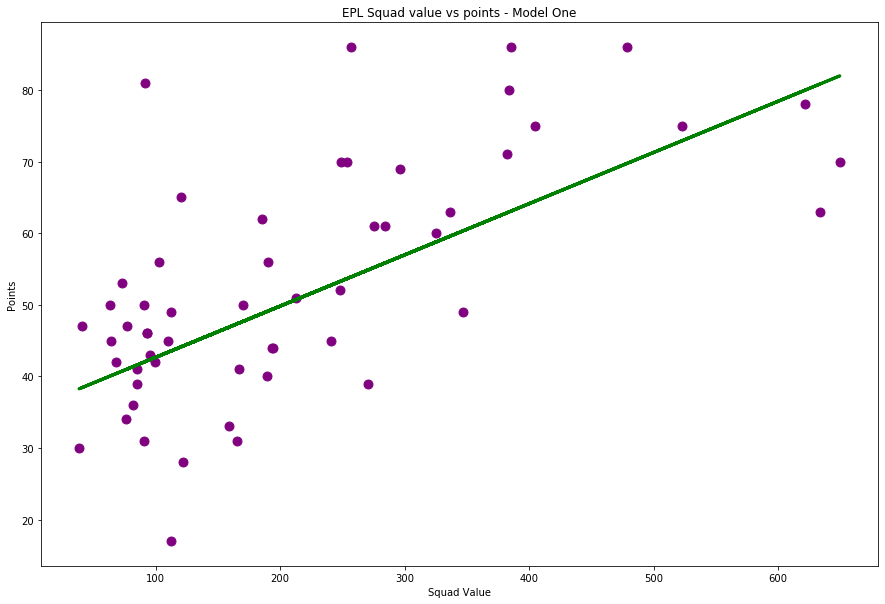

In [54]:
plt.figure(figsize=(15,10)) # width height
           
plt.scatter(X_test, y_test,  color='purple',s=80) # point size s =80

plt.plot(X_test, predictions, color='green', linewidth=3)   # LINEA PREDICCIONES

plt.xlabel("Squad Value")

plt.ylabel("Points")

plt.title("EPL Squad value vs points - Model One")

plt.show()

### Chart 2- Points Prediction against the true data

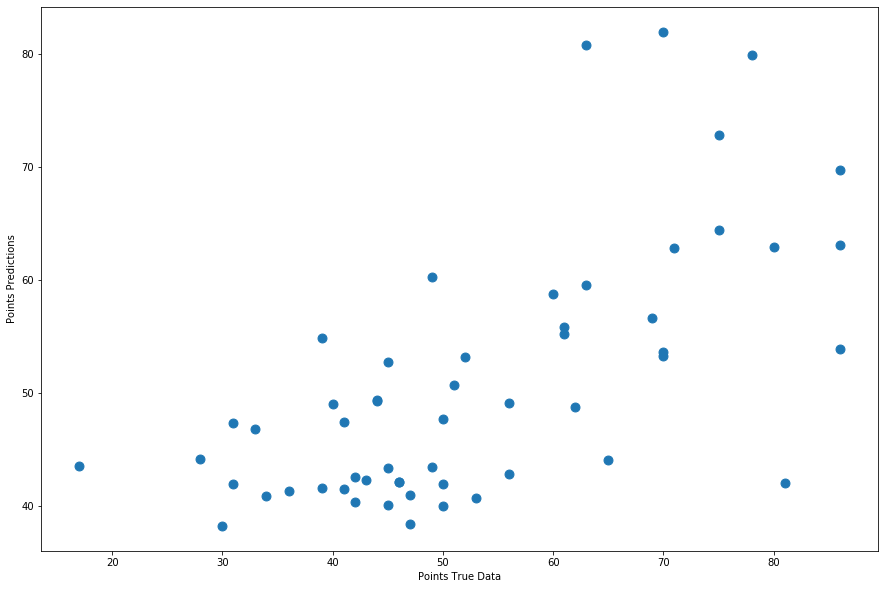

In [61]:
plt.figure(figsize=(15,10))

plt.scatter(y_test,predictions,s=80)

plt.xlabel("Points True Data")

plt.ylabel("Points Predictions")


plt.show()

### Set Start x and y 0 to 90 start end

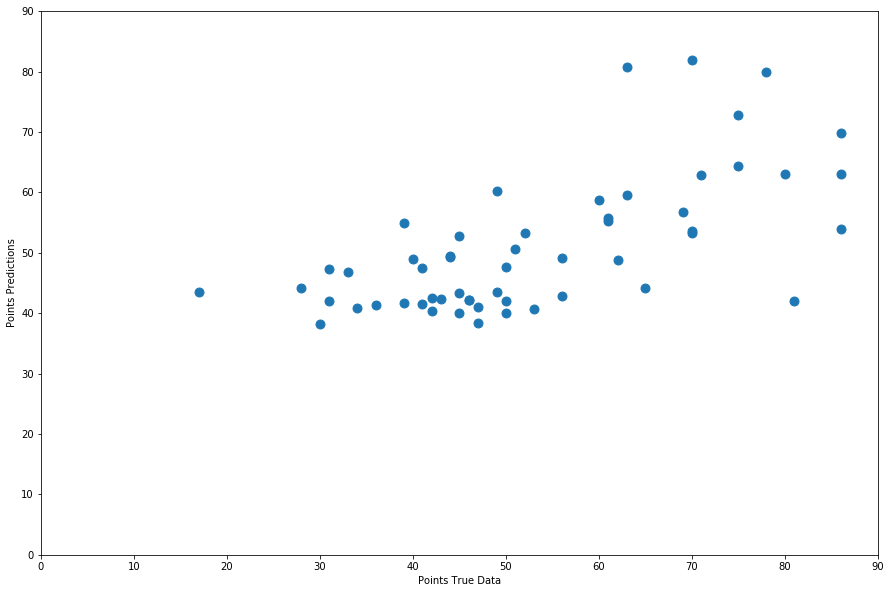

In [62]:
plt.figure(figsize=(15,10))

plt.scatter(y_test,predictions,s=80)

plt.xlabel("Points True Data")

plt.ylabel("Points Predictions")

plt.xlim([0,90])
plt.ylim([0,90])

plt.show()

Lots of values that match up well, and lots that don’t. Tough to see how far we are out, though. 
So let’s **get a histogram to plot the differences between the predictions and the true data**:

## Chart 3  - How many points out is each prediction?

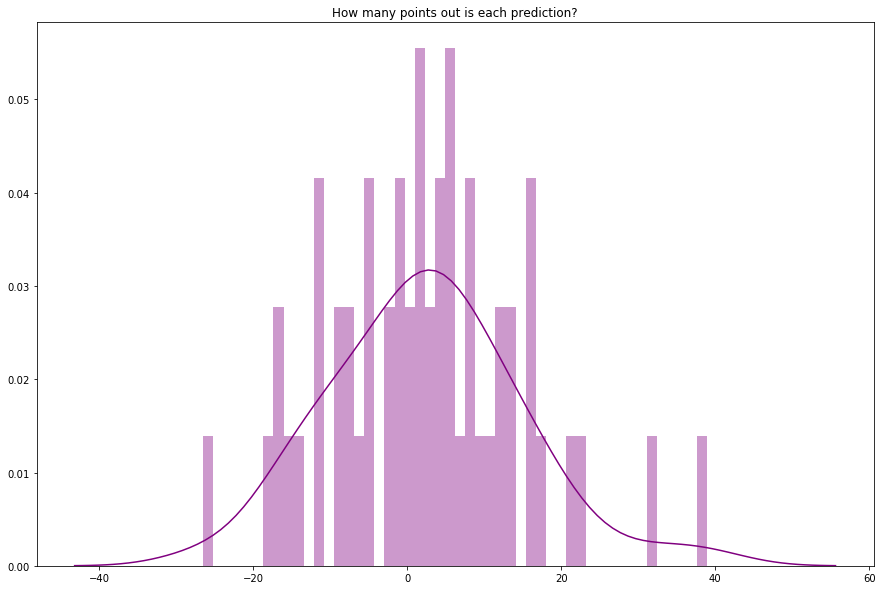

In [65]:
plt.figure(figsize=(15,10))

plt.title('How many points out is each prediction?')

sns.distplot((y_test-predictions),bins=50, color = 'purple');


A few where we are **way out, like 30-40 points out**. But mostly, we are within 10 points or so either way.


### 5.5. Model metrics - Mean Absolute Error
We are going to look to improve this, so to help with the comparison let’s use a **metric called mean absolute error**. 
This is simply the **average difference between the prediction and the truth**. Hopefully, we can reduce this with the next one.


In [68]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))

# Mean Absolute Error: 9.728206663986418

Mean Absolute Error: 9.728206663986414


Alternatively, **we could put these in a table, rather than plot them**. 
But that is a bit less friendly to work through.

In [69]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': predictions.flatten()})
df.head(10)

,Actual,Predicted
0,47,40.995974
1,56,42.834207
2,49,43.510133
3,63,80.843418
4,61,55.204724
5,65,44.123830
6,33,46.871881
7,42,42.591016
8,51,50.709280
9,86,69.763954


### Correlation between Actual y Predicted

In [70]:
df['Actual'].corr(df['Predicted'])

0.6540205213240835

## 6. Improving the model

When we took an exploratory look at the data, we found that team values had increased over seasons. 
As such, comparing a 100m squad in 2008 to a 100m squad in 2018 probably isn’t fair.

To counter this, we are going to create a new **Relative Value** column. 
This will take each team in a season, and divide it by the highest value in that league.
**These values will be between 0 & 1 and give a better impression of comparative buying power**, hence performance in the league. Hopefully it will provide for a better model than the example above.

* Let’s create this column as a list, then add it to our dataframe.


In [71]:
#Blank list
relativeValue = []

#Loop through each row
for index, team in data.iterrows():
    
    #Obtain which season we are looking at
    season = team['Season']
    
    #Create a new dataframe with just this season
    teamseason = data[data['Season'] == season]
    
    #Find the max value
    maxvalue = teamseason['Squad Value'].max()
    
    #Divide this row's value by the max value for the season
    tempRelativeValue = team['Squad Value']/maxvalue
    
    #Append it to our list
    relativeValue.append(tempRelativeValue)
    
#Add list to new column in main dataframe
data["Relative Value"] = relativeValue

data.head(30)

,League,Season,Team,Squad,Average Age,Non-Homegrown,Squad Value,Avg Player Value,GD,Points,Position,Relative Value
0,EPL,2008,Chelsea FC,28,25.6,21,406.70,14.53,44,83,3,1.000000
1,EPL,2008,Manchester United,31,24.3,20,356.10,11.49,44,90,1,0.875584
2,EPL,2008,Liverpool FC,28,23.9,24,257.23,9.19,50,86,2,0.632481
3,EPL,2008,Arsenal FC,38,21.3,30,250.85,6.6,31,72,4,0.616794
4,EPL,2008,Tottenham Hotspur,35,22.5,18,212.60,6.07,0,51,8,0.522744
5,EPL,2008,Manchester City,32,24.0,20,206.80,6.46,8,50,10,0.508483
6,EPL,2008,Everton FC,28,24.4,15,162.55,5.81,18,63,5,0.399680
7,EPL,2008,Newcastle United,32,24.8,20,134.95,4.22,-19,34,18,0.331817
8,EPL,2008,Portsmouth FC,31,26.8,19,131.50,4.24,-19,41,14,0.323334
9,EPL,2008,Aston Villa,21,25.4,8,111.80,5.32,6,62,6,0.274896


Looking good, the **4 teams below Chelsea** do indeed have lower squad values, as represented by **lower relative values**.

Let’s get a pairplot to check out the new column’s relationship with the others.

### Pairtplot to check new column relative value  relationship with others

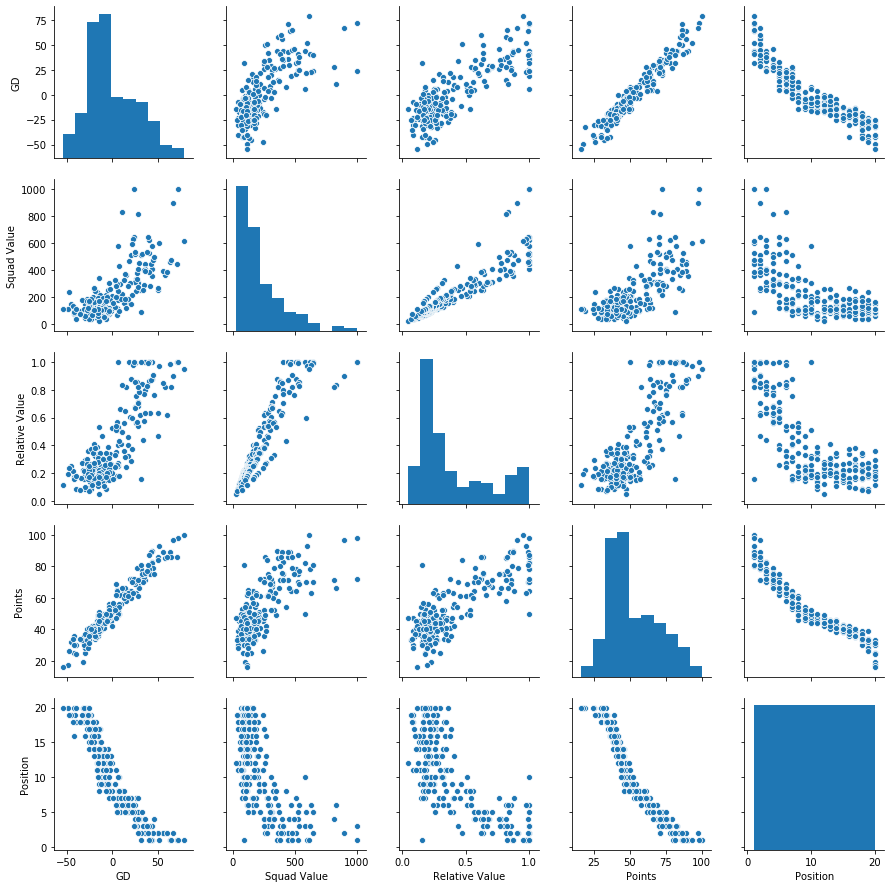

In [72]:
sns.pairplot(data[['GD', 'Squad Value', 'Relative Value', 'Points', 'Position']]);

Looks quite similar to the **squad value relationships in many parts**, but looks to have a **stronger correlation with points and goal difference**. 
Hopefully this will give us a more accurate model. 
Let’s create a new one in the same way as above

### Assign relevant columns to variables and reshape them

In [73]:
X = data['Relative Value']
y = data['Points']
X = X.values.reshape(-1,1)
y = y.values.reshape(-1,1)

### Create training and test sets for each of the two variables

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

###  Create an empty model

In [75]:
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Train it against the variables

In [76]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Check coefficient
And we’ll again look at the **coefficient** to see what our model tells us to expect. 
*  **We’ll divide it by 10, to see how many points increasing our squad value by 10% of the most expensive team should earn**


In [77]:
print(lm.coef_/10)

[[5.31884201]]


### Create Predictions

In [78]:
predictions = lm.predict(X_test)

### Relative Squad value vs points - Model Two

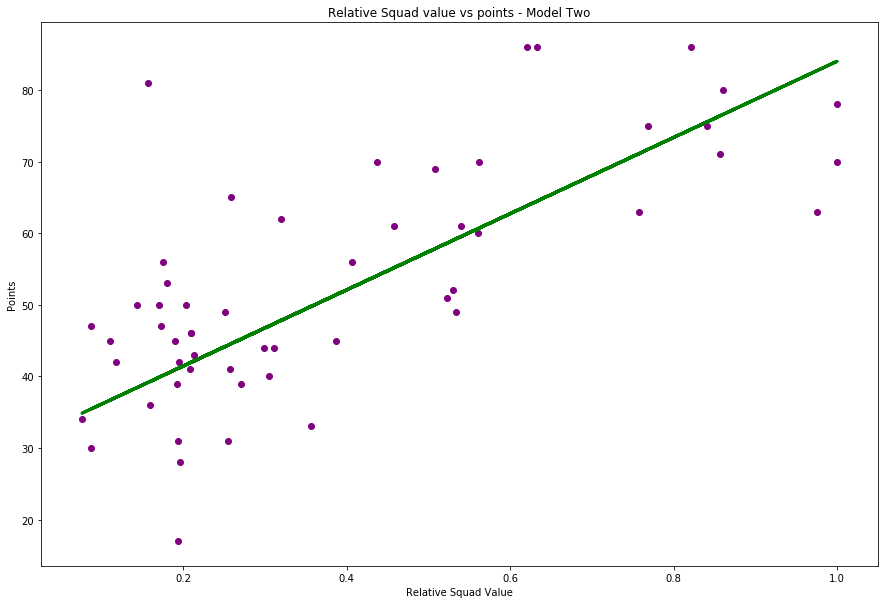

In [79]:
plt.figure(figsize=(15,10)) # width height

plt.scatter(X_test, y_test,  color='purple')

plt.plot(X_test, predictions, color='green', linewidth=3)


plt.xlabel("Relative Squad Value")

plt.ylabel("Points")


plt.title("Relative Squad value vs points - Model Two")

plt.show()

* The model predicts **just over 5 points**. This seems to make sense, as the **difference between top and bottom would often range around 53 or so points**.

* So **for every 10% that you are off of the most expensive team, our model suggests that you should expect to drop 5.3 points**.

* Let’s run the same tests as before to check out whether or not this new model performs better. 
    * Firstly, the same two charts – the scatter plot & the distribution of the errors. 
    * The scatter plot looks to to have more of a correlation and the distribution also is a bit tighter, with fewer big errors.


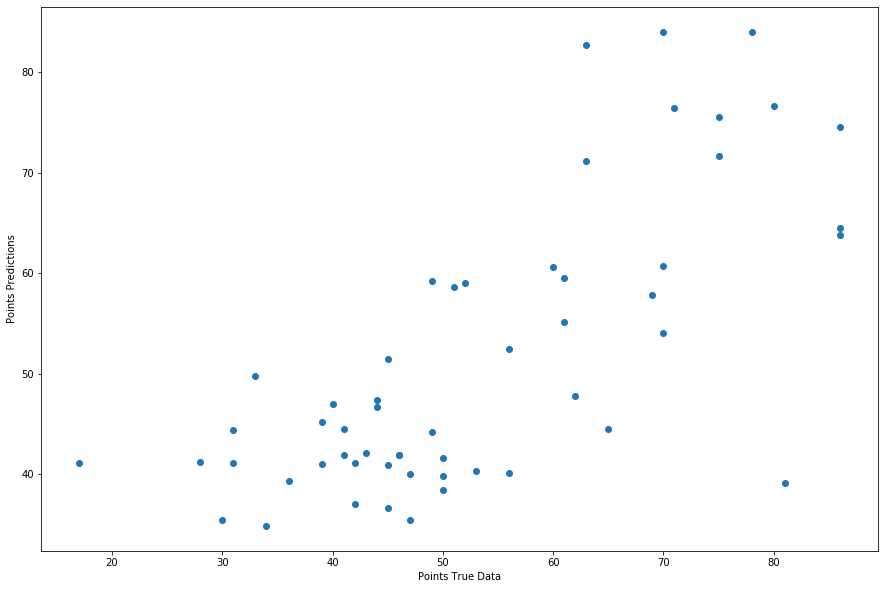

In [80]:
plt.figure(figsize=(15,10)) # width height

plt.xlabel("Points True Data")
plt.ylabel("Points Predictions")

plt.scatter(y_test,predictions);




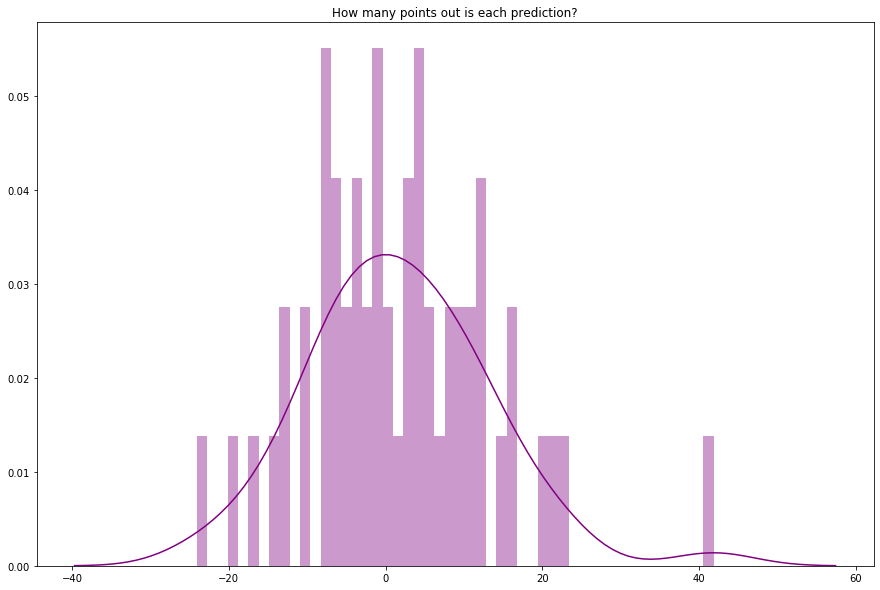

In [81]:
plt.figure(figsize=(15,10))
plt.title('How many points out is each prediction?')

sns.distplot((y_test-predictions),bins=50,color='purple');

To back up the eye test, we’ll use our **mean absolute error metric** – the average difference between the prediction and the truth. 
* Our previous metric was **Mean Absolute Error: 9.728206663986418**

In [83]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))

MAE: 8.972066563663786


So that’s **nearly an 8% improvement**… not a gamechanger, but I think we can agree that this model makes more sense than the one before. Not only does it fit better (correlation between predictions/reality also increased significantly), but we know from our own knowledge of football that transfer fees and market values have hugely inflated over the length of our dataset.

There are other oddities that you will have noticed, such as the **extreme outliers (Leicester 15/16, Chelsea 15/16, Chelsea 18/19)**, the cluster of teams around the relegation places. All of these could do with their own further analysis, but that is beyond the scope of this tutorial. Would make for a really interesting piece itself if you fancy trying your hand at this!


## 7 Summary

#### That just about covers off our simple linear regression 101 – let’s summarise what we learned.

1) Simple linear regression is an approach to explaining how one variable may affect another.

2) We built a model where we see how squad value affects points.

3) We observed what the model suggested and saw how many points an extra million spent might gain.

4) We checked the validity of the model and saw what the average error was.

5) We repeated the above with another (new) metric to create an improved model, reducing the error.

Great effort making it this far. For developing these concepts, you may want to gather data from other leagues to see if squad value is as closely related to winning as it is here. Otherwise, with aggregated event data, you could look to see how reliable shots or passes are as goal predictors.

As for building your stats model knowledge, take a read on multiple linear regressions and we will look to have an article up on this topic soon!